#Goal of the Data
1. Understand the dataset: Check for missing values, duplicates, and outliers.
2. Price distribution: Analyze how watch prices are distributed across different brands and models.
3. Brand comparison: Identify which brands have the most expensive or affordable watches.
4. Feature analysis: Examine how factors like material, movement type, or complications influence pricing.
5. Visualization: Use histograms, bar plots, scatter plots, and box plots to find trends.

# About the Dataset
This dataset contains information about luxury watch models from various brands, including their prices, case and strap materials, movement types, water resistance levels, and additional details such as case diameter, case thickness, band width, dial color, crystal material, complications, and power reserve. The data is useful for individuals interested in luxury watches, including watch collectors, enthusiasts, and retailers.

 kaggle link

# Libraries

In [17]:
# ------------------------------
# Data Wrangling and Manipulation
# ------------------------------
import pandas as pd # For handling and manipulating structured data.
import numpy as np # For numerical computations and array operations.
# ------------------------------
# Data Visualization
# ------------------------------
import matplotlib.pyplot as plt # For basic plotting
import seaborn as sns # For advanced stastical visualizations
# ------------------------------
# Data Preprocessing & Feature Engineering
# ------------------------------
from sklearn.preprocessing import StandardScaler # Standardization (mean=0, variance=1)
from sklearn.preprocessing import MinMaxScaler # Normalization (scales data between 0 and 1)
from sklearn.preprocessing import LabelEncoder # Encodes categorical labels as numbers
from sklearn.preprocessing import OneHotEncoder # Converts categorical features to one-hot encoding
from sklearn.impute import SimpleImputer # Handles missing values
# ------------------------------
# Dimensionality Reduction & Feature selection
# ------------------------------
from sklearn.decomposition import PCA # Principal Component Analysis for dimensionality reduction
from sklearn.feature_selection import SelectKBest,f_classif # Feature selection
# ------------------------------
# Model Selection and Evaluation
# ------------------------------
from sklearn.model_selection import train_test_split # Splits dataset into training and test sets
from sklearn.model_selection import cross_validate # Performs cross-validation
from sklearn.model_selection import KFold # K-Fold cross-validation
from sklearn.model_selection import GridSearchCV # Hyperparameter tuning using grid search
# ------------------------------
# Performance Metrics
# ------------------------------
from sklearn.metrics import accuracy_score # Evaluates model accuracy
from sklearn.metrics import confusion_matrix # Computes confusion matrix
from sklearn.metrics import classification_report # Precision, recall, F1-score summary
from sklearn.metrics import precision_score # Precision metric
from sklearn.metrics import recall_score # Recall metric
from sklearn.metrics import roc_auc_score # AUC-ROC score for evaluating classifiers
from sklearn import metrics # Collection of evaluation metrics
# ------------------------------
# Handling Imbalaced Datasets
# ------------------------------
from imblearn.over_sampling import SMOTE # Synthetic Minority Over-sampling Technique (for handling class imbalance)
from sklearn.utils import class_weight # Assigns weights to imbalanced classes
# ------------------------------
# Machine Learning Algorithms - Classification
# ------------------------------
from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors Classifier
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest classifier
from sklearn.naive_bayes import GaussianNB # Naive Bayes classifier
from xgboost import XGBClassifier # Extreme Gradient Boosting classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree classifier
from sklearn.ensemble import ExtraTreesClassifier # Extra Trees classifier
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent classifier
# ------------------------------
# Utility Fuctions
# ------------------------------
from sklearn.pipeline import make_pipeline # Creates machines learning pipelines
from sklearn.datasets import make_classification # Generates symthetic classification datasets
from sklearn import model_selection # Various model selection utilities
from sklearn import svm # Support Vector Machines module
from sklearn import tree # Decision tree-related utilities

# READING AND UNDERSTANDING THE FILES

In [18]:
lwp=pd.read_csv("/content/watch.csv")
lwp

,Brand,Model,Reference,Complication,Case material,Bracelet material,Dial,Hour Markings,Lunette Material,Price
0,Rolex,Datejust 31,278240,Automatic,Steel,Steel,Silver,No Markings,Steel,7900
1,Rolex,Daytona,116520,Automatic,Steel,Steel,Yellow,No Markings,Steel,98000
2,Rolex,Air King,116900,Automatic,Steel,Steel,Black,Arabic,Steel,8750
3,Rolex,Daytona,116506,Automatic,Platinum,Platinum,Blue,No Markings,Ceramic,110900
4,Rolex,Daytona,116520,Automatic,Steel,Steel,White,No Markings,Steel,22490
...,...,...,...,...,...,...,...,...,...,...
163593,Ebel,Brasilia,1215617,Automatic,Steel,Crocodile-Leather,Silver,Roman,Steel,2095
163594,Concord,Saratoga,310374,Quartz,Steel,Steel,Silver,No Markings,Steel,976
163595,Concord,Saratoga,1558237,Quartz,Steel,Gold/Steel,White,Roman,Gold/Steel,2929
163596,Rolex,Oyster Perpetual Date,15200,Automatic,Steel,Steel,Silver,No Markings,Steel,5031


# Basic Understanding of Data

In [19]:
lwp.shape

(163598, 10)

In [20]:
lwp.head()

,Brand,Model,Reference,Complication,Case material,Bracelet material,Dial,Hour Markings,Lunette Material,Price
0,Rolex,Datejust 31,278240,Automatic,Steel,Steel,Silver,No Markings,Steel,7900
1,Rolex,Daytona,116520,Automatic,Steel,Steel,Yellow,No Markings,Steel,98000
2,Rolex,Air King,116900,Automatic,Steel,Steel,Black,Arabic,Steel,8750
3,Rolex,Daytona,116506,Automatic,Platinum,Platinum,Blue,No Markings,Ceramic,110900
4,Rolex,Daytona,116520,Automatic,Steel,Steel,White,No Markings,Steel,22490


In [21]:
lwp.tail()

,Brand,Model,Reference,Complication,Case material,Bracelet material,Dial,Hour Markings,Lunette Material,Price
163593,Ebel,Brasilia,1215617,Automatic,Steel,Crocodile-Leather,Silver,Roman,Steel,2095
163594,Concord,Saratoga,310374,Quartz,Steel,Steel,Silver,No Markings,Steel,976
163595,Concord,Saratoga,1558237,Quartz,Steel,Gold/Steel,White,Roman,Gold/Steel,2929
163596,Rolex,Oyster Perpetual Date,15200,Automatic,Steel,Steel,Silver,No Markings,Steel,5031
163597,Rolex,Daytona,116503,Automatic,Gold/Steel,Gold/Steel,Black,No Markings,Yellow Gold,22448


In [22]:
lwp.sample()

,Brand,Model,Reference,Complication,Case material,Bracelet material,Dial,Hour Markings,Lunette Material,Price
99054,Carl F. Bucherer,Manero,00.10909.07.15.01,Automatic,Rose Gold,Crocodile-Leather,Gold,Roman,Rose Gold,3407


In [23]:
lwp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163598 entries, 0 to 163597
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Brand              163598 non-null  object
 1   Model              163598 non-null  object
 2   Reference          163597 non-null  object
 3   Complication       163598 non-null  object
 4   Case material      163598 non-null  object
 5   Bracelet material  163598 non-null  object
 6   Dial               163598 non-null  object
 7   Hour Markings      163598 non-null  object
 8   Lunette Material   163598 non-null  object
 9   Price              163598 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 12.5+ MB


In [24]:
lwp.describe()

,Price
count,1.635980e+05
mean,2.011539e+04
std,4.457978e+04
min,5.300000e+01
25%,4.160000e+03
50%,9.800000e+03
75%,1.959000e+04
max,4.118557e+06


In [25]:
lwp.describe(include=['O'])

,Brand,Model,Reference,Complication,Case material,Bracelet material,Dial,Hour Markings,Lunette Material
count,163598,163598,163597,163598,163598,163598,163598,163598,163598
unique,161,1855,25455,3,16,22,20,3,17
top,Rolex,Datejust 36,126334,Automatic,Steel,Steel,Black,No Markings,Steel
freq,74442,8633,3258,143612,105364,78179,61949,115809,77494


# **VISUALIZATIONS OF THE FEATURES**

---



## Price Distribution

In [26]:
lwp['Price'].value_counts()

,count
Price,
4500,411
13500,379
12500,370
14500,345
11500,338
...,...
59341,1
268244,1
43399,1


Inference:
it means most watches are affordable, with a few high-end ones driving up the maximum price.

##Brand Distribution

<ipython-input-27-25a119439caa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette="viridis")


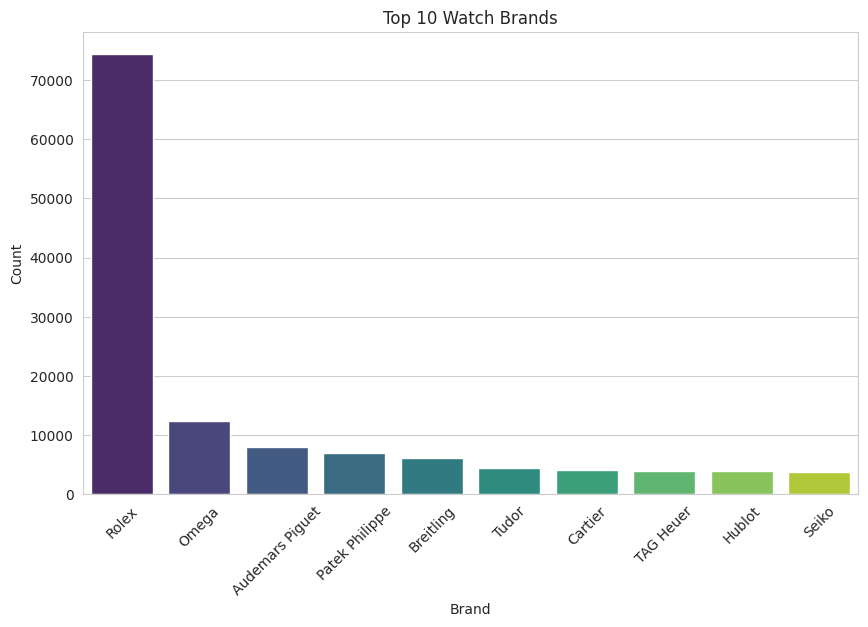

In [27]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
top_brands = lwp["Brand"].value_counts().nlargest(10)
sns.barplot(x=top_brands.index, y=top_brands.values, palette="viridis")
plt.title("Top 10 Watch Brands")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

 Inference:

The most common brands dominate the luxury watch market in terms of availability.

If highly imbalanced, certain brands (e.g., Rolex, Omega) might dominate, while others have limited presence.

If some brands have very low counts, they might be rare or exclusive brands.



## Price Distribution

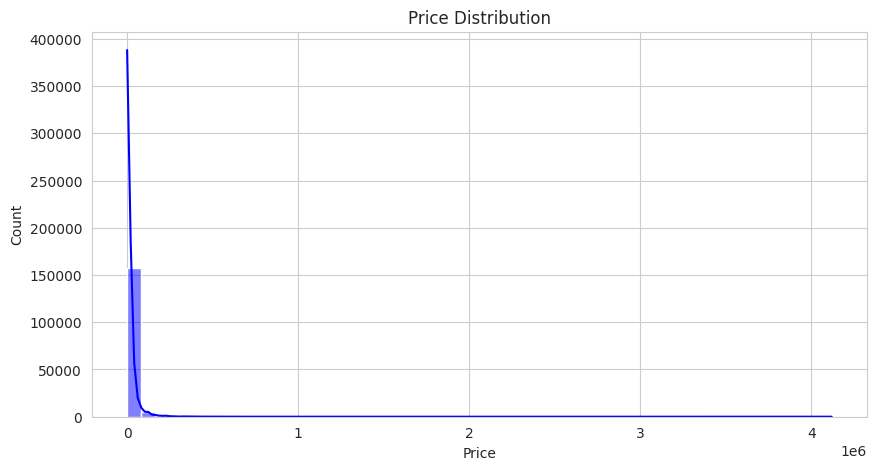

In [28]:
plt.figure(figsize=(10, 5))
sns.histplot(lwp["Price"], bins=50, kde=True, color="blue")
plt.title("Price Distribution")
plt.xlabel("Price")
plt.show()

Inference: The price distribution is skewed, indicating that while most watches fall in a certain price range, a few high-end watches are extremely expensive.

##Top 10 Case Materials

<ipython-input-29-b0966dbda3fb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_case_materials.index, y=top_case_materials.values, palette="magma")


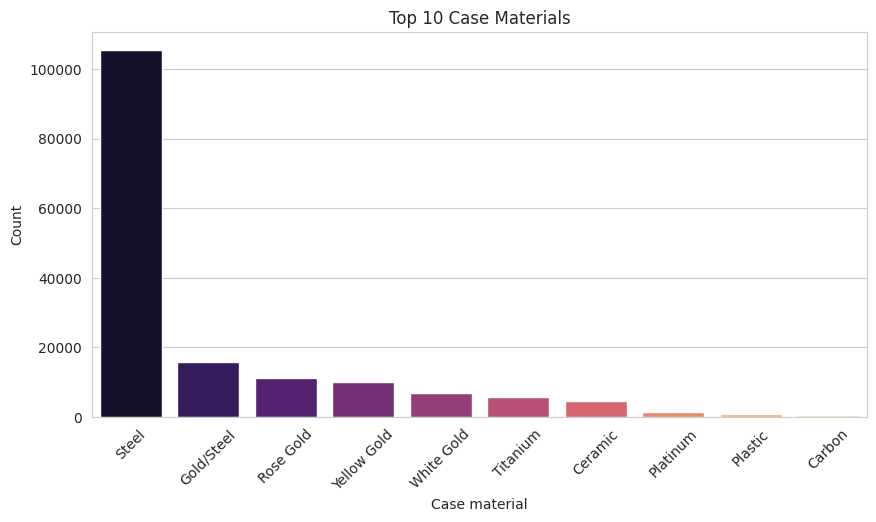

In [29]:
top_case_materials = lwp["Case material"].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_case_materials.index, y=top_case_materials.values, palette="magma")
plt.title("Top 10 Case Materials")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Inference: Certain materials like steel and gold are the most used, indicating their popularity in watch manufacturing.

##Top 10 Bracelet Materials

<ipython-input-30-2309b48fec70>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bracelet_materials.index, y=top_bracelet_materials.values, palette="coolwarm")


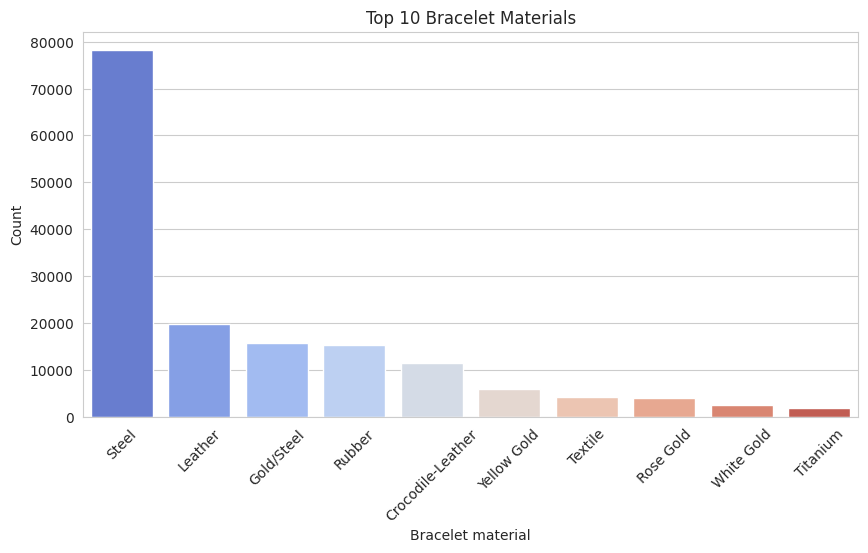

In [30]:
top_bracelet_materials = lwp["Bracelet material"].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_bracelet_materials.index, y=top_bracelet_materials.values, palette="coolwarm")
plt.title("Top 10 Bracelet Materials")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Inference: The most common bracelet materials align with case materials, showing a preference for matching materials in watches.

##Price Distribution by Brand

<ipython-input-31-cb19c915c2f8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Brand", y="Price", data=top_brands_price, palette="Set2")


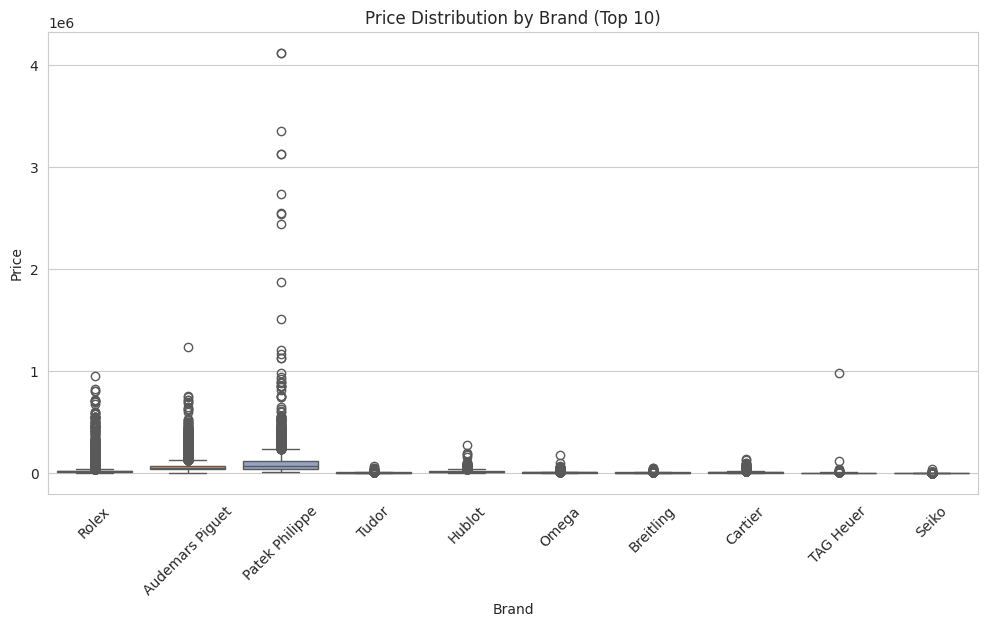

In [31]:
top_brands_price = lwp[lwp["Brand"].isin(top_brands.index)]
plt.figure(figsize=(12, 6))
sns.boxplot(x="Brand", y="Price", data=top_brands_price, palette="Set2")
plt.title("Price Distribution by Brand (Top 10)")
plt.xticks(rotation=45)
plt.show()

Inference: Some brands have a wider price range, suggesting they produce both affordable and high-end watches, while others focus on luxury models.

##Top 10 Complications

<ipython-input-32-fec55cc208af>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_complications.index, y=top_complications.values, palette="cubehelix")


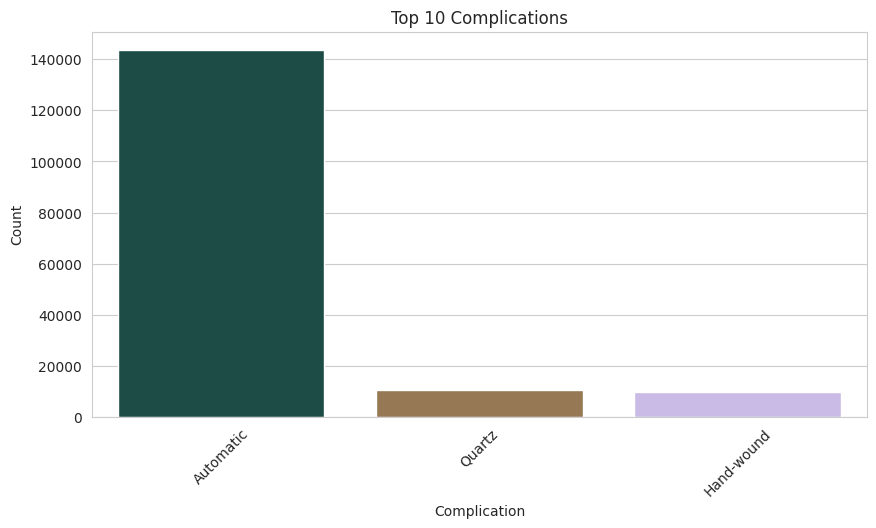

In [32]:
top_complications = lwp["Complication"].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_complications.index, y=top_complications.values, palette="cubehelix")
plt.title("Top 10 Complications")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Inference: Certain watch complications are more common, indicating demand for specific features like chronographs or automatic movements.

##Categorical Data Analysis

<ipython-input-33-211111bebc6f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=lwp, x=col, palette="viridis", order=lwp[col].value_counts().index[:10])  # Top 10 categories


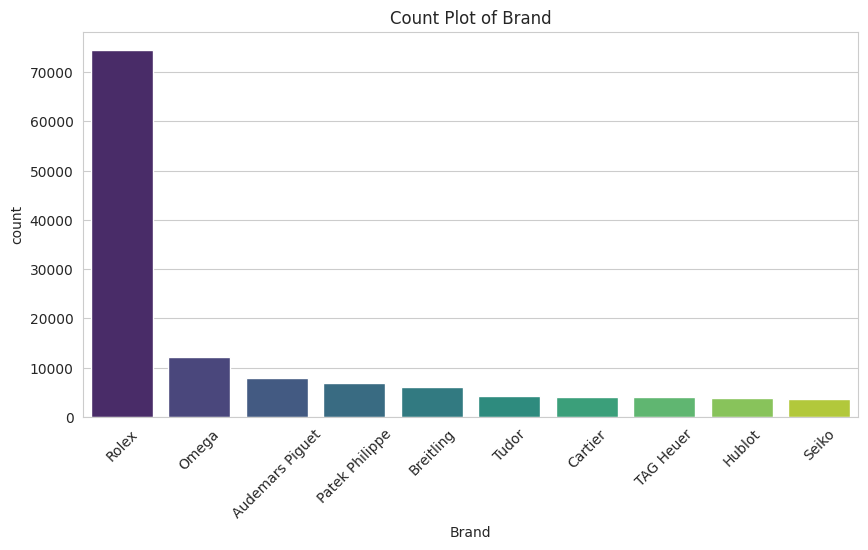

<ipython-input-33-211111bebc6f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=lwp, x=col, palette="viridis", order=lwp[col].value_counts().index[:10])  # Top 10 categories


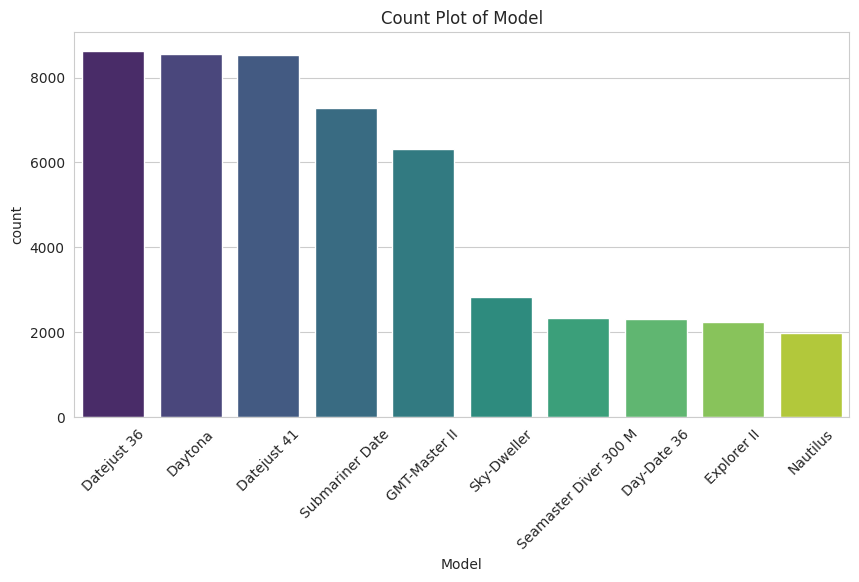

<ipython-input-33-211111bebc6f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=lwp, x=col, palette="viridis", order=lwp[col].value_counts().index[:10])  # Top 10 categories


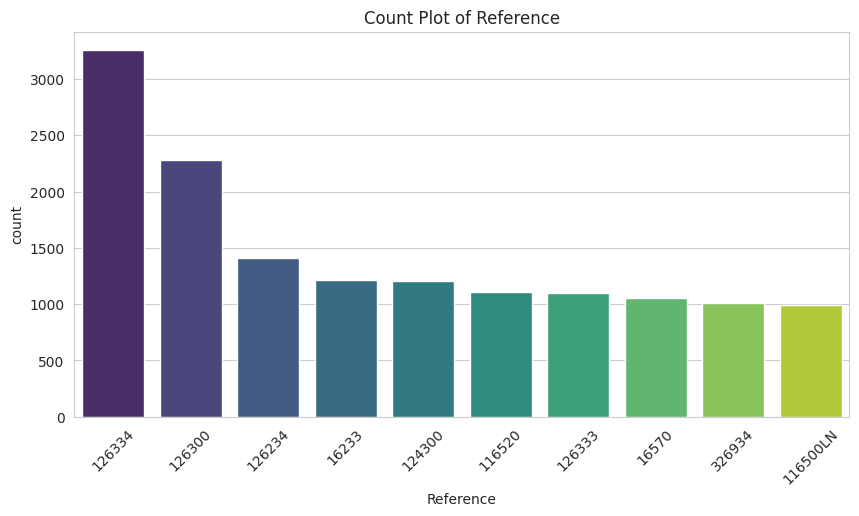

<ipython-input-33-211111bebc6f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=lwp, x=col, palette="viridis", order=lwp[col].value_counts().index[:10])  # Top 10 categories


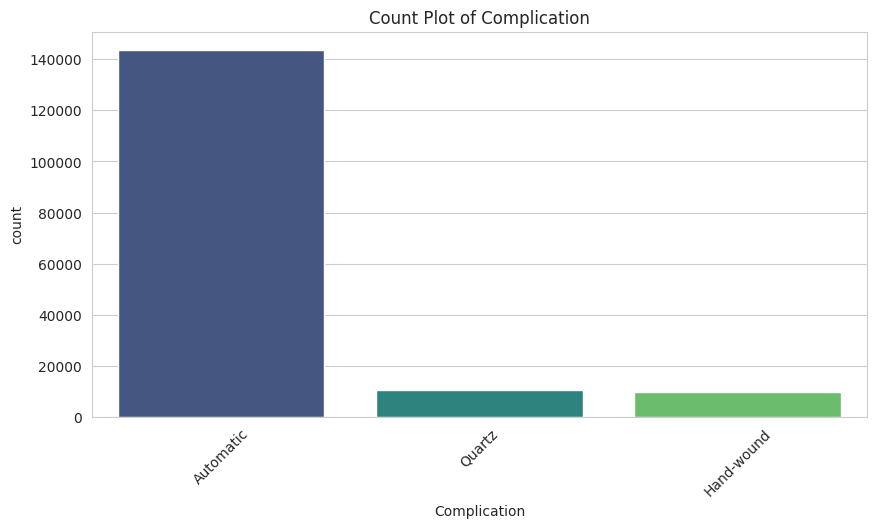

<ipython-input-33-211111bebc6f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=lwp, x=col, palette="viridis", order=lwp[col].value_counts().index[:10])  # Top 10 categories


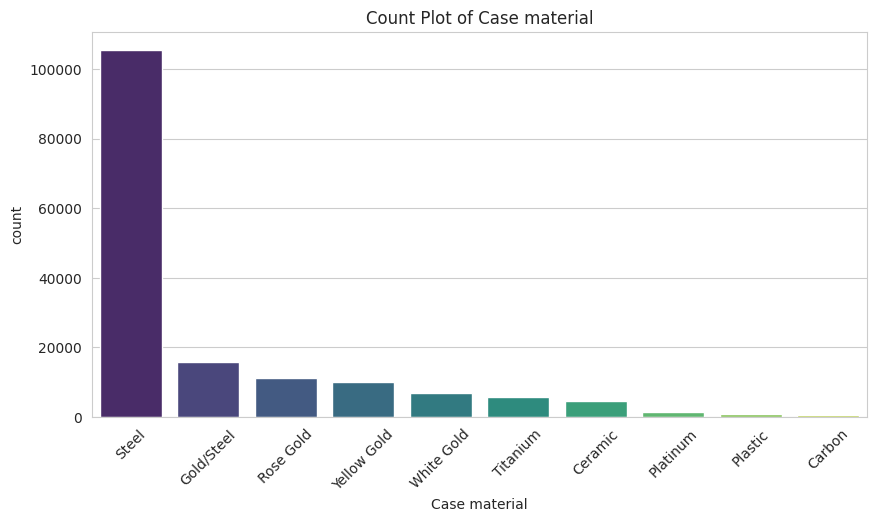

<ipython-input-33-211111bebc6f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=lwp, x=col, palette="viridis", order=lwp[col].value_counts().index[:10])  # Top 10 categories


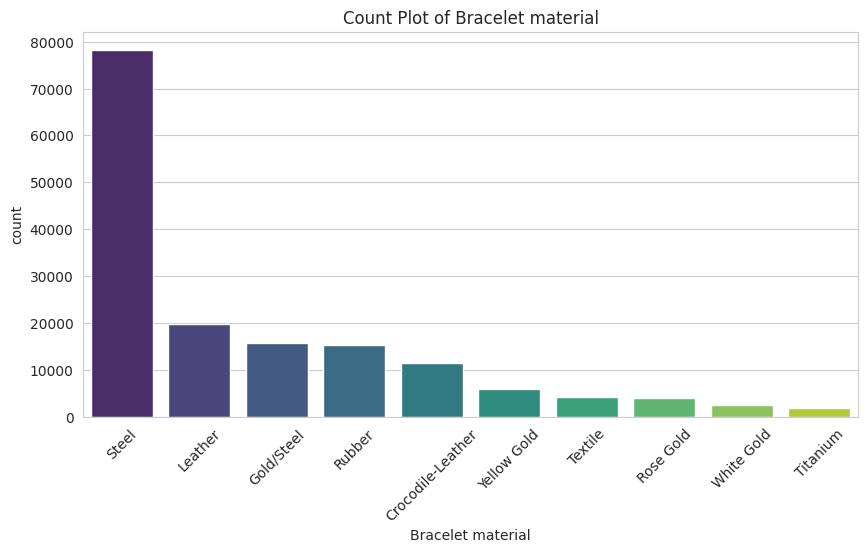

<ipython-input-33-211111bebc6f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=lwp, x=col, palette="viridis", order=lwp[col].value_counts().index[:10])  # Top 10 categories


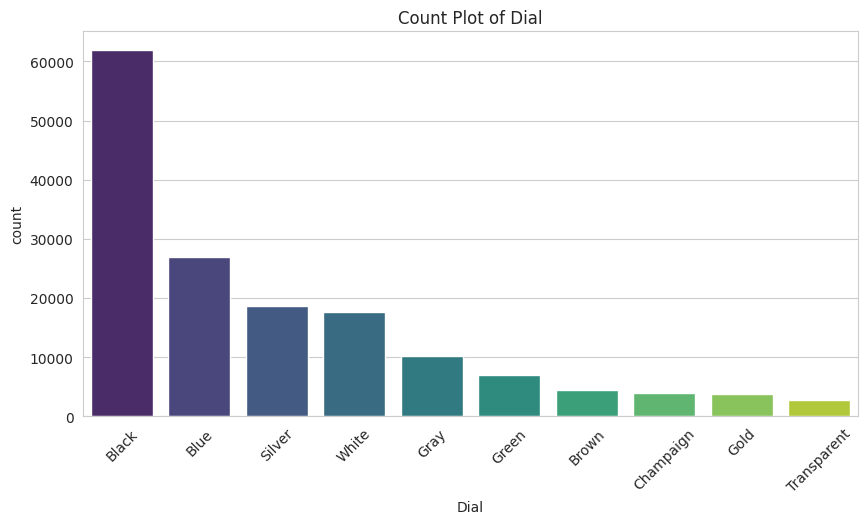

<ipython-input-33-211111bebc6f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=lwp, x=col, palette="viridis", order=lwp[col].value_counts().index[:10])  # Top 10 categories


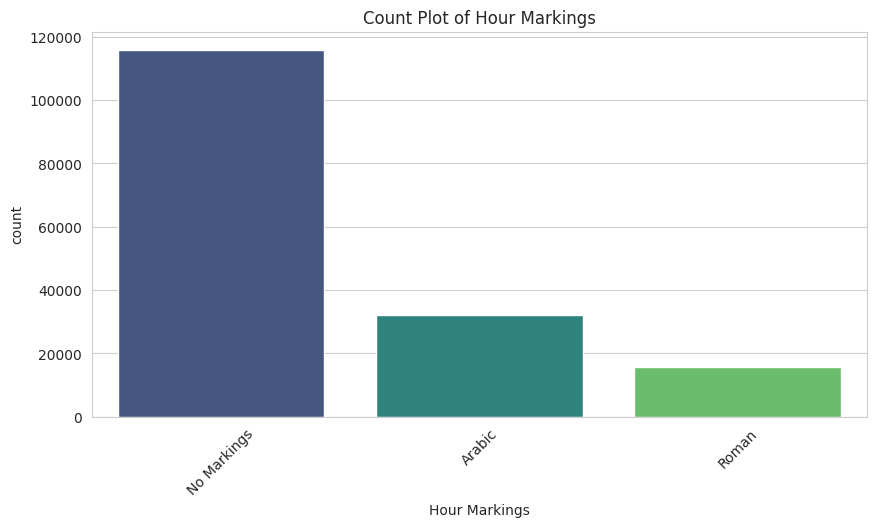

<ipython-input-33-211111bebc6f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=lwp, x=col, palette="viridis", order=lwp[col].value_counts().index[:10])  # Top 10 categories


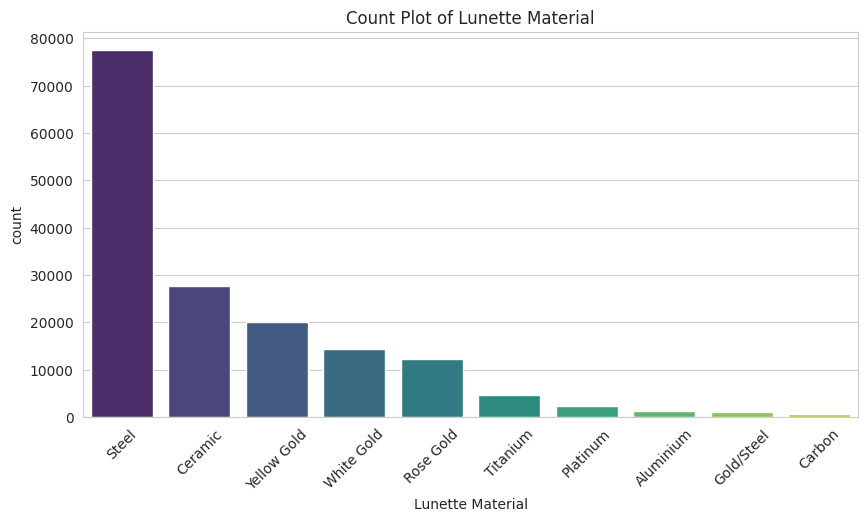

In [33]:
categorical_columns = lwp.select_dtypes(include=["object"]).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=lwp, x=col, palette="viridis", order=lwp[col].value_counts().index[:10])  # Top 10 categories
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

# Data Cleaning

##Handling Missing Values

In [34]:
lwp.isnull().sum()

,0
Brand,0
Model,0
Reference,1
Complication,0
Case material,0
Bracelet material,0
Dial,0
Hour Markings,0
Lunette Material,0
Price,0


In [35]:
lwp["Reference"].fillna("Unknown", inplace=True)

<ipython-input-35-ddf3acefa568>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lwp["Reference"].fillna("Unknown", inplace=True)


##Handle Duplicates

In [36]:
#check for duplicates
lwp.duplicated().sum()

np.int64(30963)

In [37]:
lwp = lwp.drop_duplicates()

## Conversion

In [38]:
lwp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132635 entries, 0 to 163597
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Brand              132635 non-null  object
 1   Model              132635 non-null  object
 2   Reference          132635 non-null  object
 3   Complication       132635 non-null  object
 4   Case material      132635 non-null  object
 5   Bracelet material  132635 non-null  object
 6   Dial               132635 non-null  object
 7   Hour Markings      132635 non-null  object
 8   Lunette Material   132635 non-null  object
 9   Price              132635 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 11.1+ MB


In [39]:
lwp['Brand'].value_counts()  # nominal

,count
Brand,
Rolex,54200
Omega,10767
Audemars Piguet,6597
Patek Philippe,5659
Breitling,5432
...,...
Damasko,1
Bertolucci,1
Philip Stein,1


In [40]:
lwp['Model'].value_counts()   #nominal

,count
Model,
Datejust 36,6452
Daytona,6305
Datejust 41,6233
Submariner Date,4837
GMT-Master II,4071
...,...
Dexter Gordon Limited Edition,1
Jochen Mass,1
Graf Berghe von Trips,1


In [41]:
lwp['Reference'].value_counts()

,count
Reference,
126334,2318
126300,1551
126234,1077
124300,914
126333,871
...,...
CRW6701010,1
A39363,1
CH 2673,1


In [42]:
lwp['Complication'].value_counts()

,count
Complication,
Automatic,115362
Quartz,8789
Hand-wound,8484


In [43]:
lwp['Case material'].value_counts()

,count
Case material,
Steel,84773
Gold/Steel,12474
Rose Gold,9233
Yellow Gold,8358
White Gold,5722
Titanium,5178
Ceramic,3557
Platinum,1191
Plastic,635


In [44]:
lwp['Bracelet material'].value_counts()

,count
Bracelet material,
Steel,60399
Leather,17976
Rubber,13301
Gold/Steel,12236
Crocodile-Leather,9955
Yellow Gold,4870
Textile,3294
Rose Gold,3250
White Gold,2082


In [45]:
lwp['Dial'].value_counts()

,count
Dial,
Black,48754
Blue,22127
Silver,15769
White,14559
Gray,8367
Green,5689
Brown,3707
Champaign,3293
Gold,3055


In [46]:
lwp['Hour Markings'].value_counts()

,count
Hour Markings,
No Markings,91394
Arabic,27954
Roman,13287


In [47]:
lwp['Lunette Material'].value_counts()

,count
Lunette Material,
Steel,64238
Ceramic,21010
Yellow Gold,16060
White Gold,10994
Rose Gold,10155
Titanium,4060
Platinum,1866
Aluminium,1031
Gold/Steel,884


In [48]:
lwp['Price'].value_counts()

,count
Price,
4500,306
5500,245
3500,238
6500,219
7500,203
...,...
50881,1
29961,1
38768,1


###Ordinal Encoding

In [49]:
# Map Complication types to numeric codes
complication_map = {
    'Automatic': 0,
    'Quartz': 1,
    'Hand-wound': 2
}
# Apply mapping to the 'Complication' column
lwp['Complication'] = lwp['Complication'].map(complication_map)

<ipython-input-49-d927c895ac6b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lwp['Complication'] = lwp['Complication'].map(complication_map)


### Label Encoding

In [50]:
cats_cols=lwp.columns[lwp.dtypes=='object']
for col in cats_cols:
    target_mean = lwp.groupby(col)['Price'].mean()
    lwp[col] = lwp[col].map(target_mean)

<ipython-input-50-f9c4ad438495>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lwp[col] = lwp[col].map(target_mean)
<ipython-input-50-f9c4ad438495>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lwp[col] = lwp[col].map(target_mean)
<ipython-input-50-f9c4ad438495>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [51]:
lwp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132635 entries, 0 to 163597
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Brand              132635 non-null  float64
 1   Model              132635 non-null  float64
 2   Reference          132635 non-null  float64
 3   Complication       132635 non-null  int64  
 4   Case material      132635 non-null  float64
 5   Bracelet material  132635 non-null  float64
 6   Dial               132635 non-null  float64
 7   Hour Markings      132635 non-null  float64
 8   Lunette Material   132635 non-null  float64
 9   Price              132635 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 11.1 MB


# DATA TRANSFORMATION-NUMERICAL DATA ANALYSIS

## Outlier

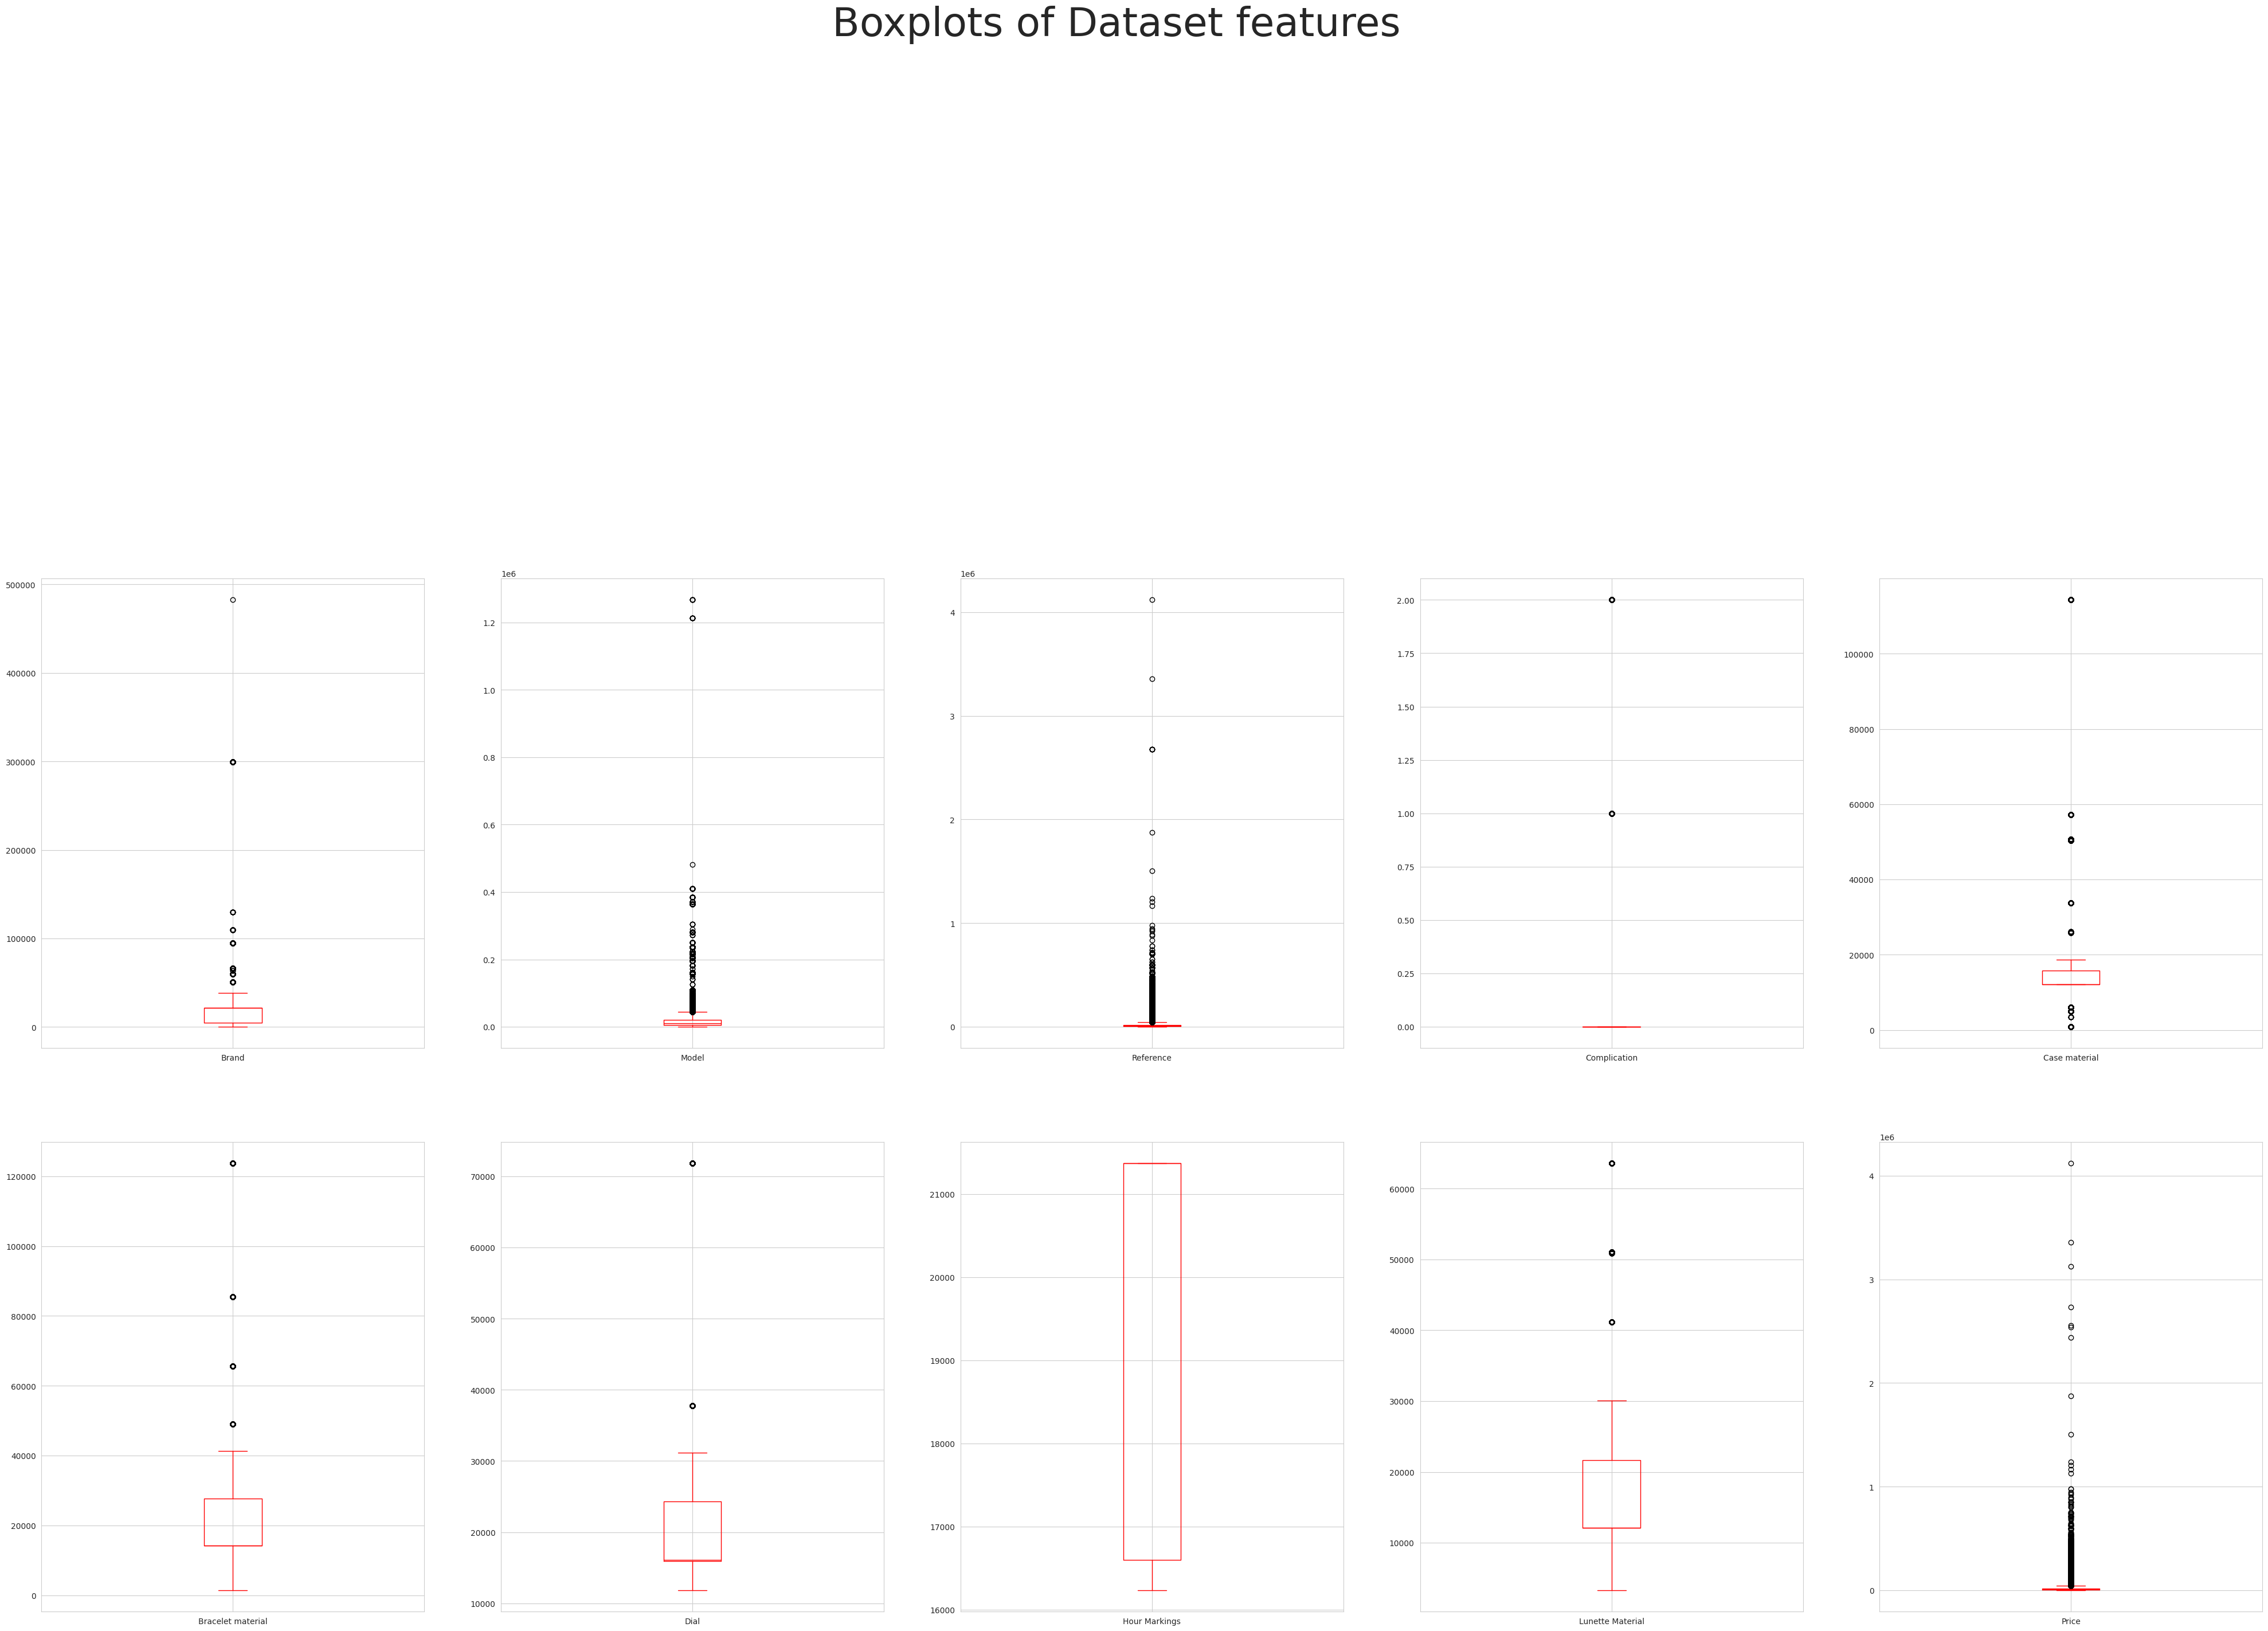

In [52]:
lwp.plot(kind='box',subplots=True, layout=(8,5),figsize=(50,100),color='red')
plt.suptitle('Boxplots of Dataset features',fontsize=50)
plt.show()

In [53]:
# Create a copy of the original dataset
lwp_copy = lwp.copy()

# Function to remove outliers using IQR
def remove_outliers_iqr(data, exclude_columns):
    for column in data.select_dtypes(include=['number']):
        if column in exclude_columns:
            continue
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the data
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Define columns to exclude (Complication is categorical here)
exclude_columns = ['Complication']

# Remove outliers
lwp = remove_outliers_iqr(lwp, exclude_columns)

# Print shape comparisons
print("Shape of data before removing outliers:", lwp_copy.shape)
print("Shape of data after removing outliers:", lwp.shape)
print("Number of outliers removed:", lwp_copy.shape[0] - lwp.shape[0])

Shape of data before removing outliers: (132635, 10)
Shape of data after removing outliers: (39495, 10)
Number of outliers removed: 93140


##Standardize Categorical Columns

In [54]:
from sklearn.preprocessing import StandardScaler

# Create a copy of the original data
watch_scaled_df = lwp.copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaler only to the 'Price' column
watch_scaled_df['Price'] = scaler.fit_transform(lwp[['Price']])

# View the result
print(watch_scaled_df.head())


           Brand         Model     Reference  Complication  Case material  \
0   21549.137601  11671.047569   8803.410959             0   12190.824756   
6   21549.137601  20201.285899  13840.366492             0   12190.824756   
9   21549.137601  19590.518090  14726.325269             0   12190.824756   
12  21549.137601  19590.518090  20343.890244             0   12190.824756   
13  21549.137601  13875.772501  10978.227595             0   12190.824756   

    Bracelet material          Dial  Hour Markings  Lunette Material     Price  
0         14199.24911  14251.926818   21366.559938      12143.613967 -0.144338  
6         14199.24911  16100.489437   21366.559938      12143.613967  0.663558  
9         14199.24911  16100.489437   21366.559938      19901.425607  1.141312  
12        14199.24911  16100.489437   21366.559938      12143.613967  1.139725  
13        14199.24911  25393.798481   21366.559938      12143.613967  1.760329  


In [55]:
print(lwp.dtypes)

Brand                float64
Model                float64
Reference            float64
Complication           int64
Case material        float64
Bracelet material    float64
Dial                 float64
Hour Markings        float64
Lunette Material     float64
Price                  int64
dtype: object


In [56]:
lwp.drop(["Reference"],axis=1)

,Brand,Model,Complication,Case material,Bracelet material,Dial,Hour Markings,Lunette Material,Price
0,21549.137601,11671.047569,0,12190.824756,14199.24911,14251.926818,21366.559938,12143.613967,7900
6,21549.137601,20201.285899,0,12190.824756,14199.24911,16100.489437,21366.559938,12143.613967,12990
9,21549.137601,19590.518090,0,12190.824756,14199.24911,16100.489437,21366.559938,19901.425607,16000
12,21549.137601,19590.518090,0,12190.824756,14199.24911,16100.489437,21366.559938,12143.613967,15990
13,21549.137601,13875.772501,0,12190.824756,14199.24911,25393.798481,21366.559938,12143.613967,19900
...,...,...,...,...,...,...,...,...,...
163590,21549.137601,10888.460557,0,12190.824756,14199.24911,24341.279487,21366.559938,12143.613967,10150
163591,2099.235251,2096.708920,0,12190.824756,14199.24911,25393.798481,21366.559938,19901.425607,1883
163592,21549.137601,24934.040531,0,12190.824756,14199.24911,16100.489437,21366.559938,12143.613967,16100
163594,4270.321429,1293.750000,1,12190.824756,14199.24911,14251.926818,21366.559938,12143.613967,976


# Model-Training and Evaluation

## Regression Modeling

In [57]:
x1=lwp.drop('Price',axis=1)
y1=lwp[['Price']]

In [58]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=42,test_size=0.2)

print('Shape of traiining features :',x1_train.shape)
print('Shape of traiining features :',x1_test.shape)
print('Shape of traiining features :',y1_train.shape)
print('Shape of traiining features :',y1_test.shape)

Shape of traiining features : (31596, 9)
Shape of traiining features : (7899, 9)
Shape of traiining features : (31596, 1)
Shape of traiining features : (7899, 1)


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [60]:
models={
    'Linear_regression': LinearRegression(),
    'RandomForest_Regressor': RandomForestRegressor(),
    'GradientBoosting_Regressor': GradientBoostingRegressor(),
    'DecisionTree_Regressor': DecisionTreeRegressor(),
    'SVM': SVR(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'ExtraTreesRegressor': ExtraTreesRegressor(),
    'BaggingRegressor' : BaggingRegressor(),
    'LGBMRegressor' : LGBMRegressor(),
    #'CatBoostRegressor' : 'CatBoostRegressor(),
    'XGBRegressor' : XGBRegressor()
}

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dictionary to store results
results = {'Model': [], 'MSE': [], 'MAE': [], 'R2': []}

# Loop through the models, train them, and calculate the metrics
for model_name, model in models.items():
    # Train the model
    model.fit(x1_train, y1_train)

    # Make predictions
    y1_pred = model.predict(x1_test)

    # Calculate metrics
    mse = mean_squared_error(y1_test, y1_pred)
    mae = mean_absolute_error(y1_test, y1_pred)
    r2 = r2_score(y1_test, y1_pred)

    # Store results in the dictionary
    results['Model'].append(model_name)
    results['MSE'].append(mse)
    results['MAE'].append(mae)
    results['R2'].append(r2)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 593
[LightGBM] [Info] Number of data points in the train set: 31596, number of used features: 7
[LightGBM] [Info] Start training from score 8830.204266


,Model,MSE,MAE,R2
0,Linear_regression,3.756114e+06,1202.191597,0.905133
1,RandomForest_Regressor,3.075439e+06,1041.388816,0.922325
2,GradientBoosting_Regressor,3.184642e+06,1074.591822,0.919567
3,DecisionTree_Regressor,3.191782e+06,1057.817319,0.919386
4,SVM,1.352461e+07,2591.981830,0.658413
5,AdaBoostRegressor,4.659790e+06,1476.860069,0.882309
6,ExtraTreesRegressor,3.129811e+06,1049.470433,0.920951
7,BaggingRegressor,3.095445e+06,1045.818538,0.921819
8,LGBMRegressor,3.011376e+06,1022.987344,0.923943
9,XGBRegressor,3.007084e+06,1025.878662,0.924051


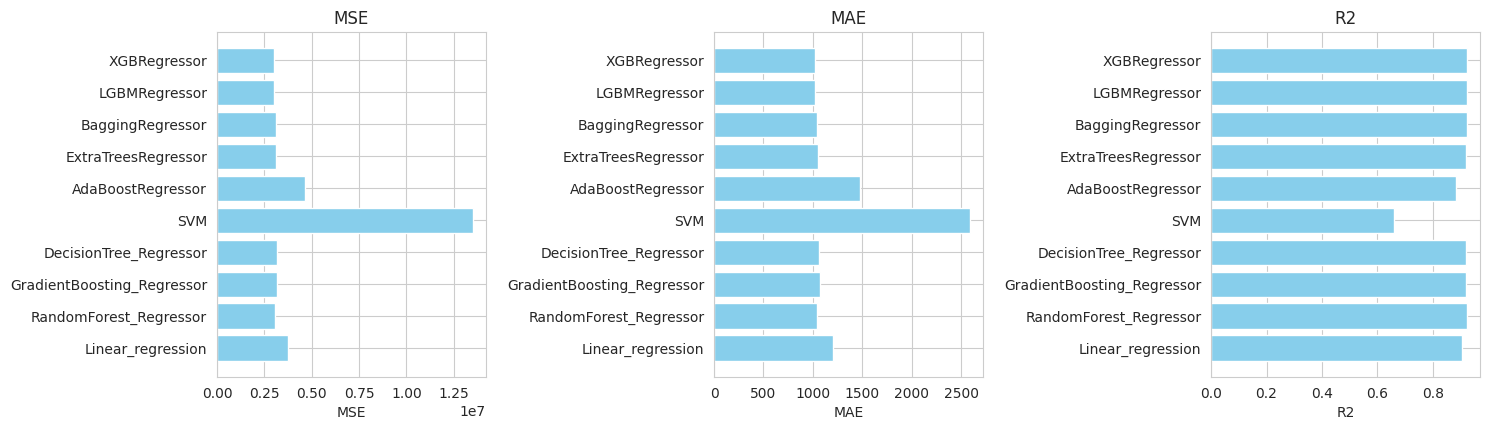

In [62]:
#ploting each metric
metrics=['MSE','MAE','R2']
plt.figure(figsize=(15,8))

for i,metric in enumerate(metrics):
    plt.subplot(2,3,i+1)
    plt.barh(results_df['Model'],results_df[metric],color='skyblue')
    plt.title(metric)
   # plt.xlim(0,1)
    plt.xlabel(metric)
plt.tight_layout()
plt.show()

#Pickle File

In [63]:
import pickle
from sklearn.ensemble import RandomForestRegressor

# Assuming 'model' is your trained RandomForestRegressor
# model = RandomForestRegressor().fit(X_train, y_train)

# Save the model
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(model, f)


The final model used was a RandomForestRegressor, which achieved a strong performance with an R² score of 0.9362, indicating that it explains approximately 93.6% of the variance in the target variable. This suggests the model fits the data very well and is reliable for making predictions.










---

